Probability of observations: 1.688815e-07
Log probability: -15.594069

Probability of observations: 8.437500e-11
Log Probability : -23.195749966735846
Most likely hidden states: [2 2 0 2 0 1 0 2 0 2 0]


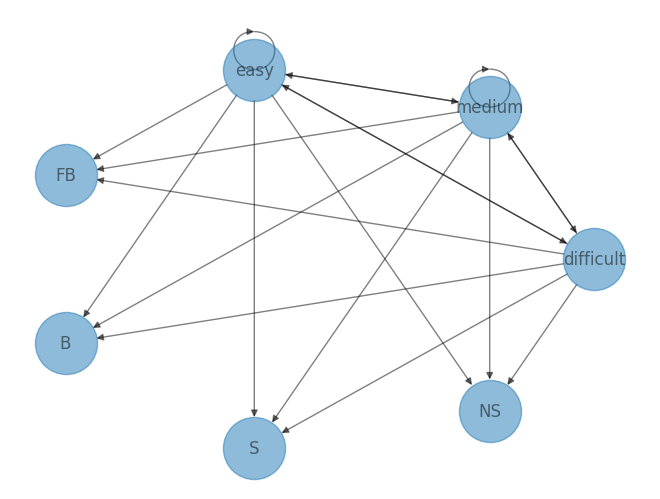

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from hmmlearn import hmm

# Punctul a
states = ["difficult", "medium", "easy"]
n_states = len(states)

observations = ["FB", "B", "S", "NS"]
n_observations = len(observations)

state_probability = np.array([1/3, 1/3, 1/3])

transition_probability = np.array([
    [0.0, 0.5, 0.5],
    [0.5, 0.25, 0.25],
    [0.5, 0.25, 0.25],
])

emission_probability = np.array([
    [0.1, 0.2, 0.4, 0.3],
    [0.15, 0.25, 0.5, 0.1],
    [0.2, 0.3, 0.4, 0.1],
])

model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

G = nx.DiGraph()
G.add_nodes_from(states + observations)
G.add_edges_from([("difficult", "easy"), ("difficult", "medium"),
                  ("medium", "difficult"), ("medium", "easy"), ("medium", "medium"),
                  ("easy", "difficult"), ("easy", "medium"), ("easy", "easy")])
G.add_edges_from([("difficult", "FB"), ("difficult", "B"), ("difficult", "S"), ("difficult", "NS"),
                  ("easy", "FB"), ("easy", "B"), ("easy", "S"), ("easy", "NS"),
                  ("medium", "FB"), ("medium", "B"), ("medium", "S"), ("medium", "NS")])

pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, pos=pos, alpha=0.5, node_size=2000)

# Punctul b
observed_grades = ["FB", "FB", "S", "B", "B", "S", "B", "B", "NS", "B", "B"]
observations_sequence = np.array([0, 0, 2, 1, 1, 2, 1, 1, 3, 1, 1]).reshape(-1, 1)

log_prob = model.score(observations_sequence)
prob = np.exp(log_prob)
print(f"Probability of observations: {prob:.6e}")
print(f"Log probability: {log_prob:.6f}")

# Punctul c
log_probability, hidden_states = model.decode(observations_sequence,
                                              lengths = len(observations_sequence),
                                              algorithm ='viterbi' )
probability = np.exp(log_probability)

print(f"\nProbability of observations: {probability:.6e}")
print('Log Probability :',log_probability)
print("Most likely hidden states:", hidden_states)